<a href="https://colab.research.google.com/github/PhaniChandraSekhar/AIML_Practice/blob/main/AIML_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

**Category:** Supervised Learning (Classification)

**Description:**
Despite its name, it's used for classification by estimating probabilities using a logistic function.

**Key Components:**
- Loss Function: Binary Cross-Entropy
- Activation: Sigmoid Function
- Decision Boundary: Linear

**Example Application:**

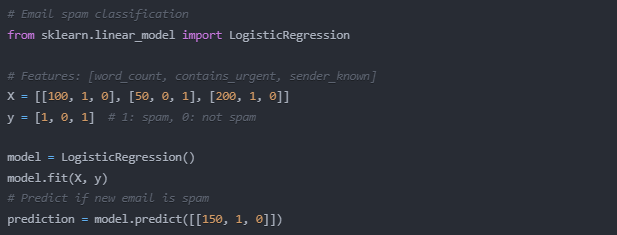


**Best Used For:**
- Credit risk assessment
- Disease diagnosis
- Email spam detection
- Customer churn prediction


**Steps to implement:**

  **Data Loading and Exploration:**

  Loads the Boston Housing dataset
  Shows basic dataset information
  Creates visualizations of data distribution
  Generates correlation matrix


  **Data Preprocessing:**

  Feature scaling using StandardScaler
  Train-test split
  Data preparation for modeling


  **Model Training:**

  Linear Regression implementation
  Feature importance visualization
  Coefficient analysis


  **Model Evaluation:**

  Multiple evaluation metrics (R², RMSE, MSE)
  Actual vs Predicted plots
  Residual analysis
  Diagnostic plots


  **Prediction Functionality:**

  Ability to make new predictions
  Example prediction with sample data

**The code includes detailed visualizations:**

Price distribution
Correlation heatmap
Feature importance plots
Residual analysis plots
Actual vs Predicted comparison

In [ ]:
# Install required libraries
!pip install seaborn numpy pandas matplotlib scikit-learn plotly

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette("husl")

In [ ]:
class BostonHousingAnalysis:
    def __init__(self):
        """Initialize the analysis class"""
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.predictions = None
        self.df = None

    def load_data(self):
        """Load and prepare the Boston Housing dataset"""
        # Load dataset
        boston = load_boston()

        # Create DataFrame
        self.df = pd.DataFrame(boston.data, columns=boston.feature_names)
        self.df['PRICE'] = boston.target

        print("Dataset Shape:", self.df.shape)
        print("\nFeatures Description:")
        print(boston.DESCR[:500] + "...")

        return self.df

    def explore_data(self):
        """Perform exploratory data analysis with visualizations"""

        # 1. Distribution of target variable (PRICE)
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df['PRICE'], kde=True)
        plt.title('Distribution of House Prices')
        plt.xlabel('Price ($1000s)')
        plt.ylabel('Count')
        plt.show()

        # 2. Correlation Matrix Heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.df.corr(), annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix of Features')
        plt.tight_layout()
        plt.show()

        # 3. Scatter plots of top 3 correlated features with price
        correlations = self.df.corr()['PRICE'].sort_values(ascending=False)
        top_features = correlations[1:4].index

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        for i, feature in enumerate(top_features):
            sns.scatterplot(data=self.df, x=feature, y='PRICE', ax=axes[i])
            axes[i].set_title(f'Price vs {feature}')
        plt.tight_layout()
        plt.show()

        # 4. Box plots for understanding price distribution across different features
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        sns.boxplot(x='RAD', y='PRICE', data=self.df, ax=axes[0,0])
        sns.boxplot(x='CHAS', y='PRICE', data=self.df, ax=axes[0,1])
        sns.boxplot(x='TAX', y='PRICE', data=self.df, ax=axes[1,0])
        sns.boxplot(x='B', y='PRICE', data=self.df, ax=axes[1,1])
        plt.tight_layout()
        plt.show()

    def prepare_data(self):
        """Prepare data for modeling"""
        # Separate features and target
        self.X = self.df.drop('PRICE', axis=1)
        self.y = self.df['PRICE']

        # Scale the features
        scaler = StandardScaler()
        self.X = scaler.fit_transform(self.X)

        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        print("Training set shape:", self.X_train.shape)
        print("Testing set shape:", self.X_test.shape)

    def train_model(self):
        """Train the linear regression model"""
        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)

        # Get feature importance
        feature_importance = pd.DataFrame({
            'Feature': self.df.drop('PRICE', axis=1).columns,
            'Coefficient': self.model.coef_
        })
        feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
        plt.title('Feature Importance (Absolute Coefficient Values)')
        plt.show()

    def evaluate_model(self):
        """Evaluate the model performance"""
        # Make predictions
        self.predictions = self.model.predict(self.X_test)

        # Calculate metrics
        mse = mean_squared_error(self.y_test, self.predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(self.y_test, self.predictions)

        print("\nModel Performance Metrics:")
        print(f"R-squared Score: {r2:.4f}")
        print(f"Root Mean Square Error: {rmse:.4f}")
        print(f"Mean Square Error: {mse:.4f}")

        # 1. Actual vs Predicted Plot
        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_test, self.predictions, alpha=0.5)
        plt.plot([self.y_test.min(), self.y_test.max()],
                [self.y_test.min(), self.y_test.max()],
                'r--', lw=2)
        plt.xlabel('Actual Prices')
        plt.ylabel('Predicted Prices')
        plt.title('Actual vs Predicted House Prices')
        plt.tight_layout()
        plt.show()

        # 2. Residuals Plot
        residuals = self.y_test - self.predictions
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.y_test, y=residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Actual Prices')
        plt.ylabel('Residuals')
        plt.title('Residuals vs Actual Prices')
        plt.show()

        # 3. Residuals Distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True)
        plt.title('Distribution of Residuals')
        plt.xlabel('Residual Value')
        plt.ylabel('Count')
        plt.show()

    def predict_new_data(self, new_data):
        """Make predictions on new data"""
        # Example of new_data format:
        # new_data should be a 2D array with the same features as training data
        predictions = self.model.predict(new_data)
        return predictions


In [ ]:
def main():
    # Create instance of analysis class
    analysis = BostonHousingAnalysis()

    # Step 1: Load and explore data
    print("Step 1: Loading data...")
    df = analysis.load_data()

    print("\nStep 2: Exploring data...")
    analysis.explore_data()

    # Step 3: Prepare data for modeling
    print("\nStep 3: Preparing data...")
    analysis.prepare_data()

    # Step 4: Train model
    print("\nStep 4: Training model...")
    analysis.train_model()

    # Step 5: Evaluate model
    print("\nStep 5: Evaluating model...")
    analysis.evaluate_model()

    # Example prediction
    print("\nStep 6: Example prediction...")
    # Create sample new data (one house)
    sample_house = np.array([[0.02731, 0, 7.07, 0, 0.469, 6.421, 78.9, 4.9671, 2, 242, 17.8, 396.9, 9.14]])
    predicted_price = analysis.predict_new_data(sample_house)
    print(f"\nPredicted price for sample house: ${predicted_price[0]*1000:.2f}")

if __name__ == "__main__":
    main()